In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn import metrics
#pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#Frankfurt stock exchange
df=pd.read_csv('C:/Users/Srujan/Documents/Datasets/frankfurt_stock_exchange.csv',parse_dates=['Date'])#,index_col='Date')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3129 non-null   datetime64[ns]
 1   Open                   2659 non-null   float64       
 2   High                   2992 non-null   float64       
 3   Low                    2992 non-null   float64       
 4   Close                  3129 non-null   float64       
 5   Change                 10 non-null     float64       
 6   Traded Volume          2958 non-null   float64       
 7   Turnover               2946 non-null   float64       
 8   Last Price of the Day  0 non-null      float64       
 9   Daily Traded Units     0 non-null      float64       
 10  Daily Turnover         12 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 269.0 KB
None


Date   Open   High    Low  Close  Change  Traded Volume  Turnover  \
0 2008-05-09  25.90  29.68  25.90  29.40     NaN        26986.0  791604.0   
1 2008-05-12  29.45  29.45  29.00  29.45     NaN          981.0   28612.0   
2 2008-05-13  29.50  29.90  29.44  29.85     NaN         1638.0   48289.0   
3 2008-05-14  29.30  29.30  28.77  29.30     NaN          183.0    5344.0   
4 2008-05-15  29.35  29.70  28.75  29.70     NaN          674.0   19824.0   

   Last Price of the Day  Daily Traded Units  Daily Turnover  
0                    NaN                 NaN             NaN  
1                    NaN                 NaN             NaN  
2                    NaN                 NaN             NaN  
3                    NaN                 NaN             NaN  
4                    NaN                 NaN             NaN

In [3]:
#df.reset_index(inplace=True)

In [4]:
df.drop(columns=['Change','Last Price of the Day','Daily Traded Units','Daily Turnover','Turnover','Traded Volume'],inplace=True)
df.head()

Date   Open   High    Low  Close
0 2008-05-09  25.90  29.68  25.90  29.40
1 2008-05-12  29.45  29.45  29.00  29.45
2 2008-05-13  29.50  29.90  29.44  29.85
3 2008-05-14  29.30  29.30  28.77  29.30
4 2008-05-15  29.35  29.70  28.75  29.70

In [5]:
data = df[160:2969]
data

Date    Open    High     Low   Close
160  2008-12-19   26.00   26.00   26.00   26.00
161  2008-12-22   26.00   26.00   26.00   26.00
162  2008-12-23   26.00   26.07   26.00   26.07
163  2008-12-24     NaN     NaN     NaN   26.07
164  2008-12-25     NaN     NaN     NaN   26.07
165  2008-12-26     NaN     NaN     NaN   26.07
166  2008-12-29   25.65   26.76   25.00   25.81
167  2008-12-30   26.77   26.77   26.10   26.10
168  2008-12-31     NaN     NaN     NaN   26.10
169  2009-01-01     NaN     NaN     NaN   26.10
170  2009-01-02   25.91   25.91   25.91   25.91
171  2009-01-05     NaN     NaN     NaN   25.90
172  2009-01-06   25.00   26.54   25.00   26.54
173  2009-01-07   25.62   26.58   25.62   26.58
174  2009-01-08   25.50   25.50   25.50   25.50
175  2009-01-09   25.50   25.50   25.50   25.50
176  2009-01-12   25.50   25.50   25.50   25.50
177  2009-01-13     NaN     NaN     NaN   25.00
178  2009-01-14   25.50   25.50   25.50   25.50
179  2009-01-15   25.50   25.50   25.50   25.50
180  2009-01-16   25.50   25.50   25.50   25.50
181  2009-01-19   25.50   25.50   25.50   25.50
182  2009-01-20   25.70   25.70   25.70   25.70
183  2009-01-21   25.50   25.50   25.50   25.50
184  2009-01-22   25.60   26.54   25.60   26.54
185  2009-01-23     NaN     NaN     NaN   25.90
186  2009-01-26   26.51   26.51   26.50   26.50
187  2009-01-27   26.10   26.10   26.10   26.10
188  2009-01-28     NaN     NaN     NaN   25.97
189  2009-01-29     NaN     NaN     NaN   25.97
190  2009-01-30   26.00   26.00   25.95   25.95
191  2009-02-02   25.50   26.93   25.50   26.20
192  2009-02-03   26.00   26.23   26.00   26.23
193  2009-02-04   26.25   26.25   26.25   26.25
194  2009-02-05   26.20   26.23   26.20   26.23
195  2009-02-06   26.23   26.23   23.15   26.00
196  2009-02-09   25.46   26.01   25.46   25.69
197  2009-02-10   25.71   26.50   25.71   26.50
198  2009-02-11   26.00   26.00   26.00   26.00
199  2009-02-12     NaN     NaN     NaN   25.30
200  2009-02-13     NaN     NaN     NaN   25.30
201  2009-02-16   26.19   27.17   26.19   27.17
202  2009-02-17     NaN     NaN     NaN   25.78
203  2009-02-18     NaN     NaN     NaN   25.78
204  2009-02-19   26.74   26.74   26.74   26.74
205  2009-02-20     NaN     NaN     NaN   25.83
206  2009-02-23     NaN     NaN     NaN   25.83
207  2009-02-24     NaN     NaN     NaN   25.83
208  2009-02-25     NaN     NaN     NaN   25.83
209  2009-02-26     NaN     NaN     NaN   25.83
210  2009-02-27   25.83   26.71   25.83   26.71
211  2009-03-02     NaN     NaN     NaN   25.75
212  2009-03-03   26.00   26.00   26.00   26.00
213  2009-03-04   26.00   26.00   26.00   26.00
214  2009-03-05   26.00   26.00   26.00   26.00
215  2009-03-06     NaN     NaN     NaN   25.61
216  2009-03-09   25.27   26.00   25.27   26.00
217  2009-03-10   26.00   26.00   26.00   26.00
218  2009-03-11   26.16   26.16   26.00   26.00
219  2009-03-12   26.00   26.00   26.00   26.00
220  2009-03-13   26.00   26.00   26.00   26.00
221  2009-03-16   26.00   26.00   26.00   26.00
222  2009-03-17   26.00   26.00   26.00   26.00
223  2009-03-18   26.00   26.00   26.00   26.00
224  2009-03-19   26.00   26.00   26.00   26.00
225  2009-03-20   26.00   26.00   26.00   26.00
226  2009-03-23   26.00   26.00   26.00   26.00
227  2009-03-24   26.00   26.36   26.00   26.36
228  2009-03-25     NaN     NaN     NaN   26.05
229  2009-03-26     NaN     NaN     NaN   26.05
230  2009-03-27     NaN     NaN     NaN   26.05
231  2009-03-30     NaN     NaN     NaN   26.05
232  2009-03-31   26.92   26.92   26.92   26.92
233  2009-04-01   27.00   27.00   27.00   27.00
234  2009-04-02   27.00   27.00   27.00   27.00
235  2009-04-03   27.00   27.00   27.00   27.00
236  2009-04-06   27.00   27.00   27.00   27.00
237  2009-04-07   27.00   27.00   27.00   27.00
238  2009-04-08   27.00   27.00   27.00   27.00
239  2009-04-09   27.00   27.00   27.00   27.00
240  2009-04-10     NaN     NaN     NaN   27.00
241  2009-04-13     NaN     NaN     NaN   27.00
242  2009-04-14   27.00   2

In [6]:
data = data.interpolate(method='linear')
data

Date        Open        High         Low   Close
160  2008-12-19   26.000000   26.000000   26.000000   26.00
161  2008-12-22   26.000000   26.000000   26.000000   26.00
162  2008-12-23   26.000000   26.070000   26.000000   26.07
163  2008-12-24   25.912500   26.242500   25.750000   26.07
164  2008-12-25   25.825000   26.415000   25.500000   26.07
165  2008-12-26   25.737500   26.587500   25.250000   26.07
166  2008-12-29   25.650000   26.760000   25.000000   25.81
167  2008-12-30   26.770000   26.770000   26.100000   26.10
168  2008-12-31   26.483333   26.483333   26.036667   26.10
169  2009-01-01   26.196667   26.196667   25.973333   26.10
170  2009-01-02   25.910000   25.910000   25.910000   25.91
171  2009-01-05   25.455000   26.225000   25.455000   25.90
172  2009-01-06   25.000000   26.540000   25.000000   26.54
173  2009-01-07   25.620000   26.580000   25.620000   26.58
174  2009-01-08   25.500000   25.500000   25.500000   25.50
175  2009-01-09   25.500000   25.500000   25.500000   25.50
176  2009-01-12   25.500000   25.500000   25.500000   25.50
177  2009-01-13   25.500000   25.500000   25.500000   25.00
178  2009-01-14   25.500000   25.500000   25.500000   25.50
179  2009-01-15   25.500000   25.500000   25.500000   25.50
180  2009-01-16   25.500000   25.500000   25.500000   25.50
181  2009-01-19   25.500000   25.500000   25.500000   25.50
182  2009-01-20   25.700000   25.700000   25.700000   25.70
183  2009-01-21   25.500000   25.500000   25.500000   25.50
184  2009-01-22   25.600000   26.540000   25.600000   26.54
185  2009-01-23   26.055000   26.525000   26.050000   25.90
186  2009-01-26   26.510000   26.510000   26.500000   26.50
187  2009-01-27   26.100000   26.100000   26.100000   26.10
188  2009-01-28   26.066667   26.066667   26.050000   25.97
189  2009-01-29   26.033333   26.033333   26.000000   25.97
190  2009-01-30   26.000000   26.000000   25.950000   25.95
191  2009-02-02   25.500000   26.930000   25.500000   26.20
192  2009-02-03   26.000000   26.230000   26.000000   26.23
193  2009-02-04   26.250000   26.250000   26.250000   26.25
194  2009-02-05   26.200000   26.230000   26.200000   26.23
195  2009-02-06   26.230000   26.230000   23.150000   26.00
196  2009-02-09   25.460000   26.010000   25.460000   25.69
197  2009-02-10   25.710000   26.500000   25.710000   26.50
198  2009-02-11   26.000000   26.000000   26.000000   26.00
199  2009-02-12   26.063333   26.390000   26.063333   25.30
200  2009-02-13   26.126667   26.780000   26.126667   25.30
201  2009-02-16   26.190000   27.170000   26.190000   27.17
202  2009-02-17   26.373333   27.026667   26.373333   25.78
203  2009-02-18   26.556667   26.883333   26.556667   25.78
204  2009-02-19   26.740000   26.740000   26.740000   26.74
205  2009-02-20   26.588333   26.735000   26.588333   25.83
206  2009-02-23   26.436667   26.730000   26.436667   25.83
207  2009-02-24   26.285000   26.725000   26.285000   25.83
208  2009-02-25   26.133333   26.720000   26.133333   25.83
209  2009-02-26   25.981667   26.715000   25.981667   25.83
210  2009-02-27   25.830000   26.710000   25.830000   26.71
211  2009-03-02   25.915000   26.355000   25.915000   25.75
212  2009-03-03   26.000000   26.000000   26.000000   26.00
213  2009-03-04   26.000000   26.000000   26.000000   26.00
214  2009-03-05   26.000000   26.000000   26.000000   26.00
215  2009-03-06   25.635000   26.000000   25.635000   25.61
216  2009-03-09   25.270000   26.000000   25.270000   26.00
217  2009-03-10   26.000000   26.000000   26.000000   26.00
218  2009-03-11   26.160000   26.160000   26.000000   26.00
219  2009-03-12   26.000000   26.000000   26.000000   26.00
220  2009-03-13   26.000000   26.000000   26.000000   26.00
221  2009-03-16   26.000000   26.000000   26.000000   26.00
222  2009-03-17   26.000000   26.000000   26.000000   26.00
223  2009-03-18   26.000000   26.000000   26.000000   26.00
224  2009-03-19   26.000000   26.000000   26.000000   26.00
225  2009-03-20   26.000000   26.000000   26.000000

In [7]:
data = data[9:]
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = [d.strftime('%b') for d in data.Date]
data['day'] = pd.DatetimeIndex(data['Date']).dayofweek
data.set_index('Date',inplace=True)

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2800 entries, 2009-01-01 to 2019-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2800 non-null   float64
 1   High    2800 non-null   float64
 2   Low     2800 non-null   float64
 3   Close   2800 non-null   float64
 4   year    2800 non-null   int64  
 5   month   2800 non-null   object 
 6   day     2800 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 175.0+ KB


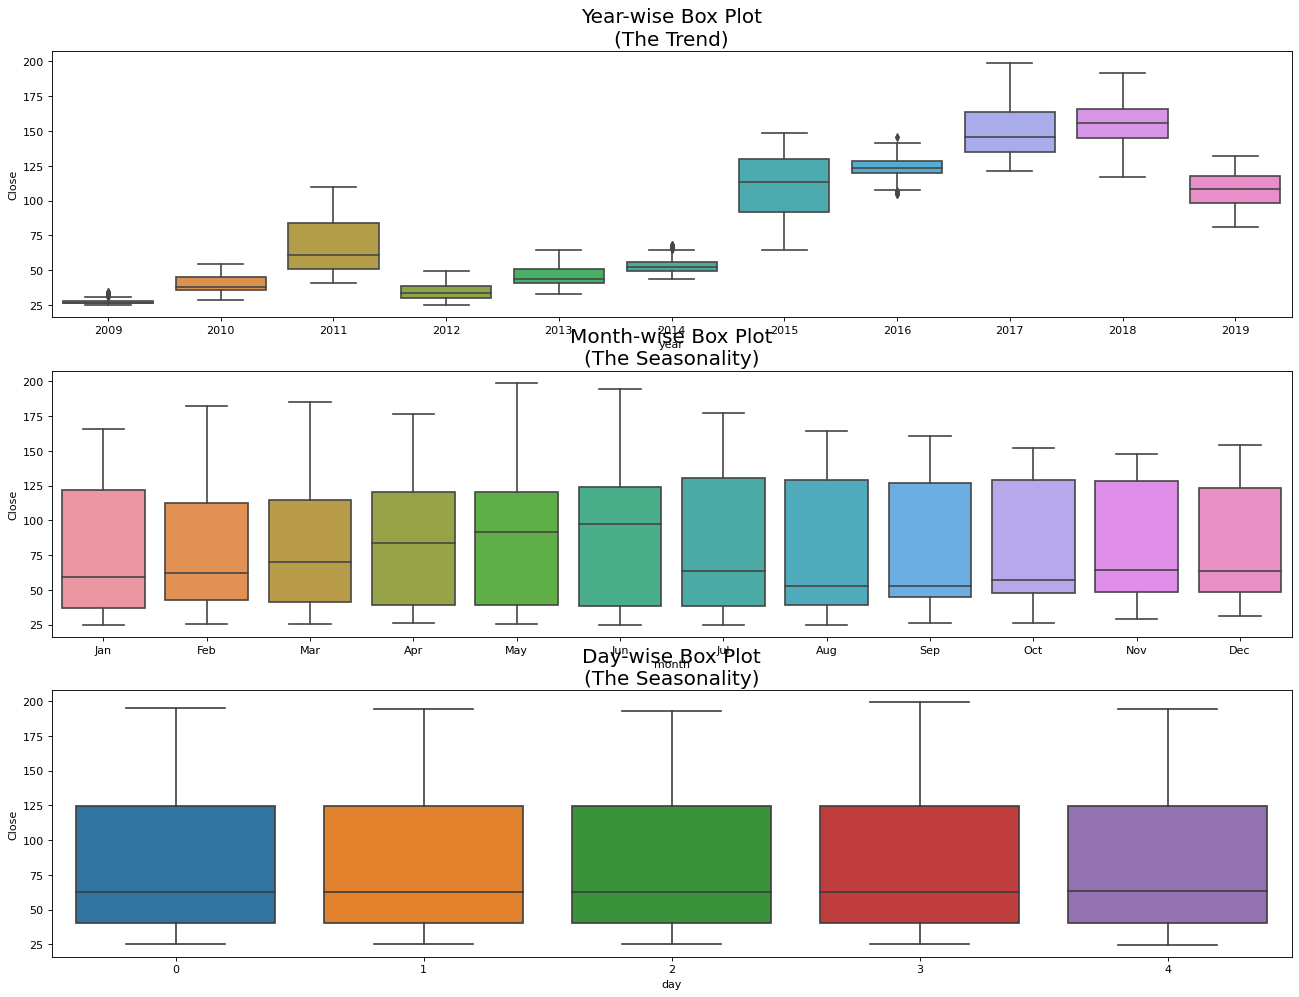

In [9]:
# Draw Plot
fig, axes = plt.subplots(3, 1, figsize=(20,15), dpi= 80)
sns.boxplot(x='year', y='Close', data=data, ax=axes[0])
sns.boxplot(x='month', y='Close', data=data,ax = axes[1])
sns.boxplot(x='day', y='Close', data=data,ax = axes[2])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 

axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

axes[2].set_title('Day-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

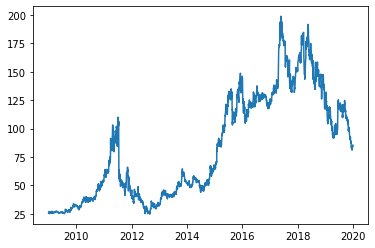

In [10]:
plt.plot(data['Close'])

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if __name__ == '__main__':


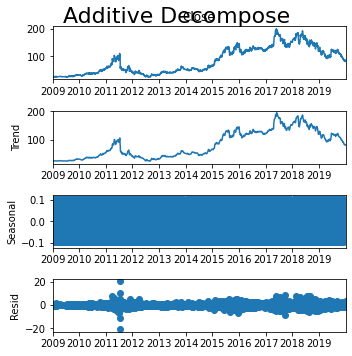

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
# Multiplicative Decomposition 
#result_mul = seasonal_decompose(data['Total_Sunspots'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(data['Close'], model='add', extrapolate_trend='freq',freq=5)

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [12]:
data['rolling_mean'] = data['Close'].rolling(12).mean()
data['Detrend'] = data['Close'] - data['rolling_mean']
data

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Open        High         Low   Close  year month  day  \
Date                                                                      
2009-01-01   26.196667   26.196667   25.973333   26.10  2009   Jan    3   
2009-01-02   25.910000   25.910000   25.910000   25.91  2009   Jan    4   
2009-01-05   25.455000   26.225000   25.455000   25.90  2009   Jan    0   
2009-01-06   25.000000   26.540000   25.000000   26.54  2009   Jan    1   
2009-01-07   25.620000   26.580000   25.620000   26.58  2009   Jan    2   
2009-01-08   25.500000   25.500000   25.500000   25.50  2009   Jan    3   
2009-01-09   25.500000   25.500000   25.500000   25.50  2009   Jan    4   
2009-01-12   25.500000   25.500000   25.500000   25.50  2009   Jan    0   
2009-01-13   25.500000   25.500000   25.500000   25.00  2009   Jan    1   
2009-01-14   25.500000   25.500000   25.500000   25.50  2009   Jan    2   
2009-01-15   25.500000   25.500000   25.500000   25.50  2009   Jan    3   
2009-01-16   25.500000   25.500000   25.500000   25.50  2009   Jan    4   
2009-01-19   25.500000   25.500000   25.500000   25.50  2009   Jan    0   
2009-01-20   25.700000   25.700000   25.700000   25.70  2009   Jan    1   
2009-01-21   25.500000   25.500000   25.500000   25.50  2009   Jan    2   
2009-01-22   25.600000   26.540000   25.600000   26.54  2009   Jan    3   
2009-01-23   26.055000   26.525000   26.050000   25.90  2009   Jan    4   
2009-01-26   26.510000   26.510000   26.500000   26.50  2009   Jan    0   
2009-01-27   26.100000   26.100000   26.100000   26.10  2009   Jan    1   
2009-01-28   26.066667   26.066667   26.050000   25.97  2009   Jan    2   
2009-01-29   26.033333   26.033333   26.000000   25.97  2009   Jan    3   
2009-01-30   26.000000   26.000000   25.950000   25.95  2009   Jan    4   
2009-02-02   25.500000   26.930000   25.500000   26.20  2009   Feb    0   
2009-02-03   26.000000   26.230000   26.000000   26.23  2009   Feb    1   
2009-02-04   26.250000   26.250000   26.250000   26.25  2009   Feb    2   
2009-02-05   26.200000   26.230000   26.200000   26.23  2009   Feb    3   
2009-02-06   26.230000   26.230000   23.150000   26.00  2009   Feb    4   
2009-02-09   25.460000   26.010000   25.460000   25.69  2009   Feb    0   
2009-02-10   25.710000   26.500000   25.710000   26.50  2009   Feb    1   
2009-02-11   26.000000   26.000000   26.000000   26.00  2009   Feb    2   
2009-02-12   26.063333   26.390000   26.063333   25.30  2009   Feb    3   
2009-02-13   26.126667   26.780000   26.126667   25.30  2009   Feb    4   
2009-02-16   26.190000   27.170000   26.190000   27.17  2009   Feb    0   
2009-02-17   26.373333   27.026667   26.373333   25.78  2009   Feb    1   
2009-02-18   26.556667   26.883333   26.556667   25.78  2009   Feb    2   
2009-02-19   26.740000   26.740000   26.740000   26.74  2009   Feb    3   
2009-02-20   26.588333   26.735000   26.588333   25.83  2009   Feb    4   
2009-02-23   26.436667   26.730000   26.436667   25.83  2009   Feb    0   
2009-02-24   26.285000   26.725000   26.285000   25.83  2009   Feb    1   
2009-02-25   26.133333   26.720000   26.133333   25.83  2009   Feb    2   
2009-02-26   25.981667   26.715000   25.981667   25.83  2009   Feb    3   
2009-02-27   25.830000   26.710000   25.830000   26.71  2009   Feb    4   
2009-03-02   25.915000   26.355000   25.915000   25.75  2009   Mar    0   
2009-03-03   26.000000   26.000000   26.000000   26.00  2009   Mar    1   
2009-03-04   26.000000   26.000000   26.000000   26.00  2009   Mar    2   
2009-03-05   26.000000   26.000000   26.000000   26.00  2009   Mar    3   
2009-03-06   25.635000   26.000000   25.635000   25.61  2009   Mar    4   
2009-03-09   25.270000   26.000000   25.270000   26.00  2009   Mar    0   
2009-03-10   26.000000   26.000000   26.000000   26.00  2009   Mar    1   
2009-03-11   26.160000   26.160000   26.000000   26.00  2009   Mar    2   
2009-03-12   26.000000   26.000000   26.000000   26.00  2009   Mar    3   
2009-03-13   26.000000   26.000000   26.000

Text(0.5, 1.0, 'Trend')

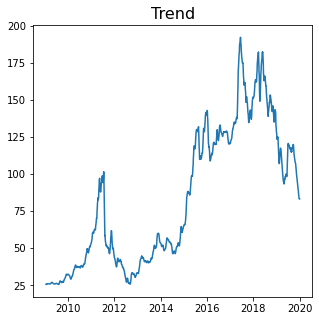

In [13]:
plt.plot(data['rolling_mean'])
plt.title('Trend',fontsize=16)

Text(0.5, 1.0, 'Detrended')

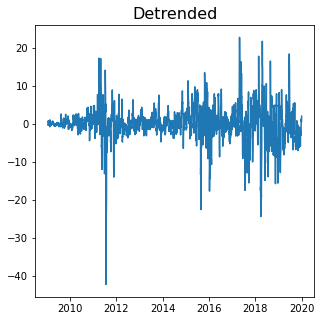

In [14]:
plt.plot(data['Detrend'])
plt.title('Detrended',fontsize=16)

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


Text(0.5, 1.0, 'Drug Sales deseasonalized by subtracting the seasonal component')

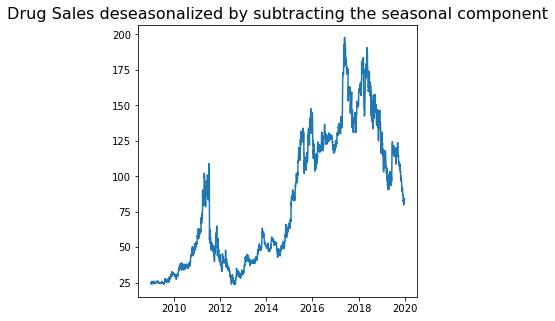

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(data['Close'], model='mul', extrapolate_trend='freq',freq=96)
detrended = data.Close.values -result_add.seasonal
plt.plot(detrended)
plt.title('Drug Sales deseasonalized by subtracting the seasonal component', fontsize=16)

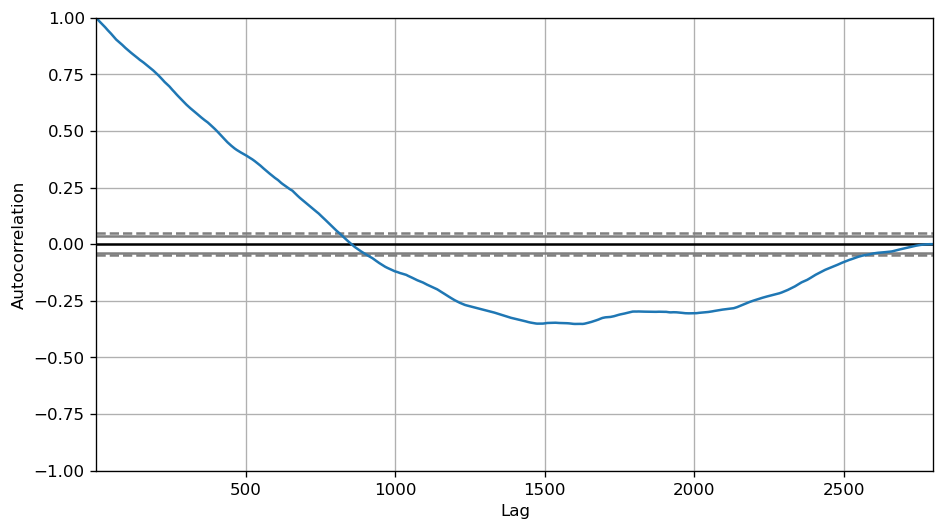

In [16]:
from pandas.plotting import autocorrelation_plot


# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(data['Close'].tolist())

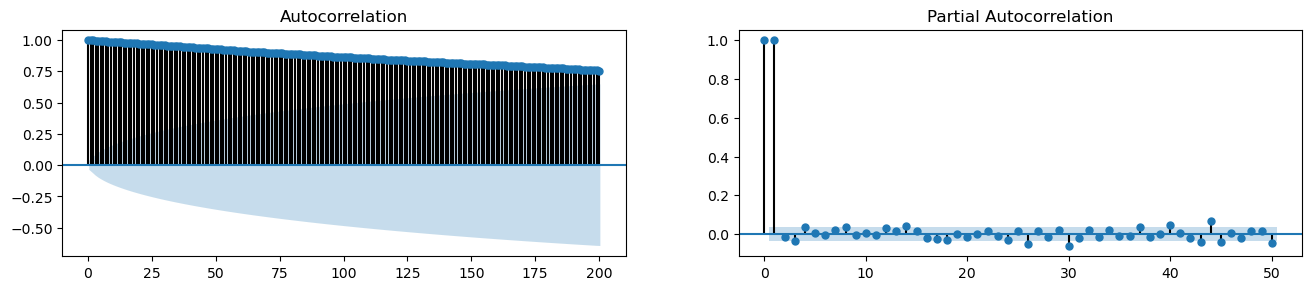

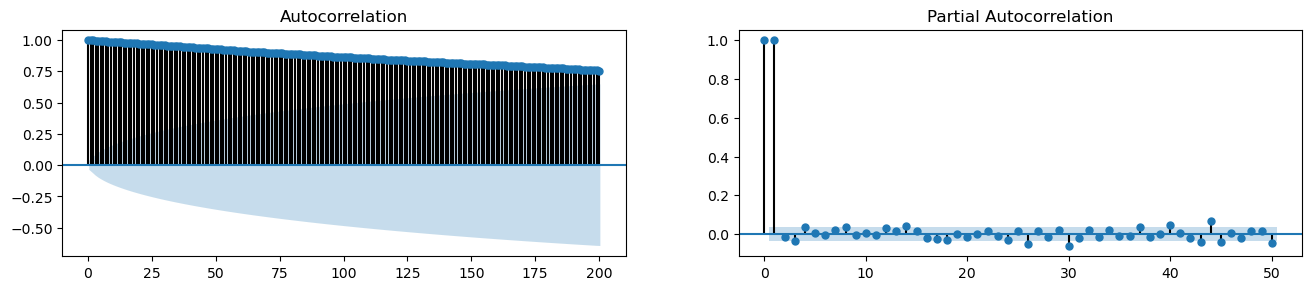

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data['Close'].tolist(), lags=200, ax=axes[0])
plot_pacf(data['Close'].tolist(), lags=50, ax=axes[1])

## Halt Winter's

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


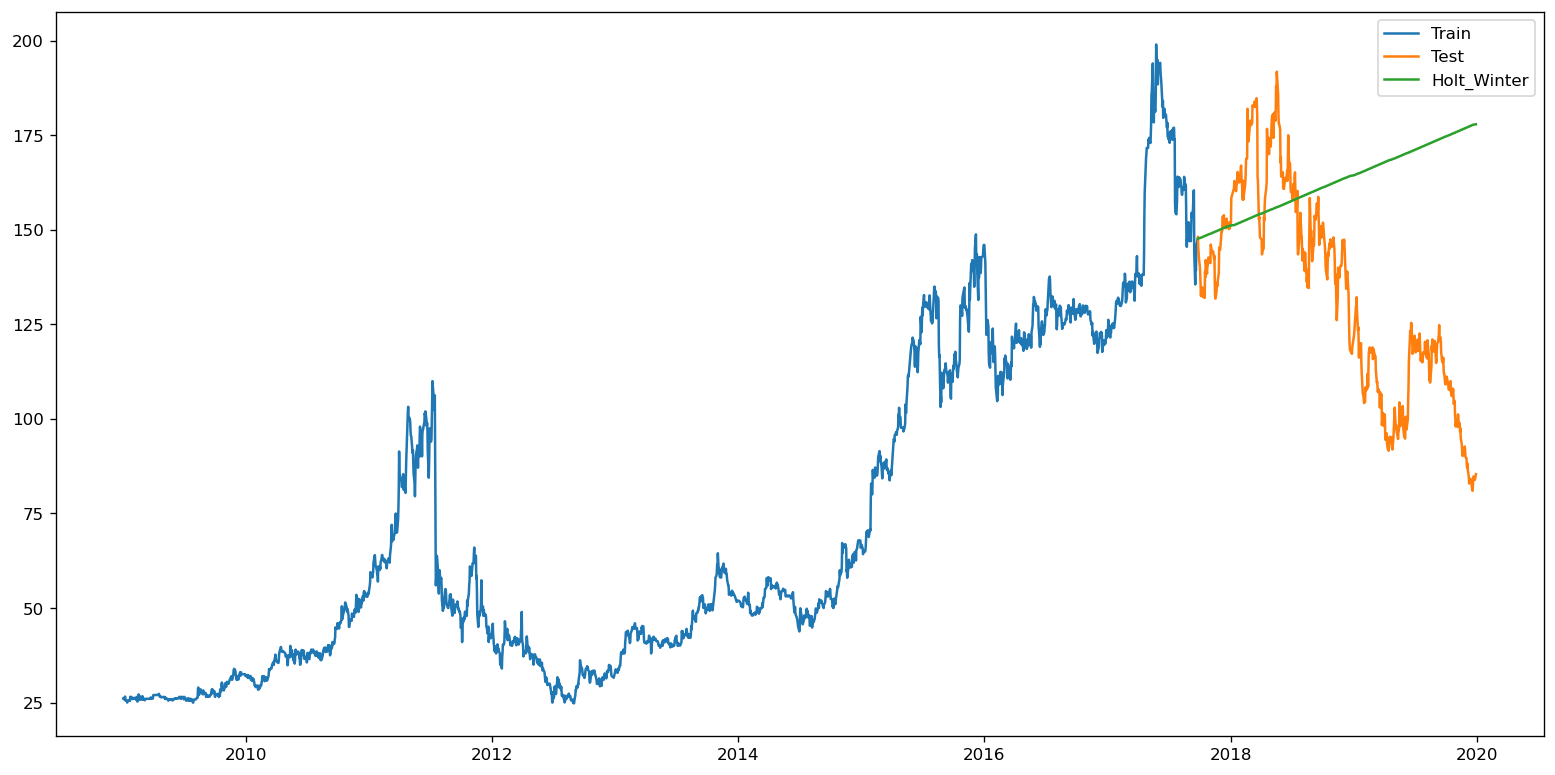

In [18]:
count = int(data.shape[0]*0.8)
Train = data[:count]
Test = data[count:]

y_hat_avg = Test.copy()
fit1 = Holt(np.asarray(Train['Close'])).fit()
y_hat_avg['Holt_Winter'] = fit1.predict(start=count+1,end=data.shape[0])
plt.figure(figsize=(16,8))
plt.plot(Train.index, Train['Close'], label='Train')
plt.plot(Test.index,Test['Close'], label='Test')
plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
# plt.savefig('Holt_Winters.jpg')

## ARIMA one model.

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Close'],order=(5,0,1))
model_fit=model.fit()

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2800
Model:                     ARMA(5, 1)   Log Likelihood               -6411.740
Method:                       css-mle   S.D. of innovations              2.387
Date:                Sat, 29 Aug 2020   AIC                          12839.479
Time:                        18:33:55   BIC                          12886.978
Sample:                             0   HQIC                         12856.624
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.5492     28.381      2.556      0.011      16.923     128.175
ar.L1.Close     1.8498      0.004    459.131      0.000       1.842       1.858
ar.L2.Close    -0.8268      0.009    -95.163      0.000      -0.844      -0.810
ar.L3.Close    -0.0823      0.024     -3.379      0.001      -0.130      -0.035
ar.L4.Close     0.0709      0.038      1.879      0.060      -0.003       0.145
ar.L5.Close    -0.0118      0.019     -0.627      0.530      -0.049       0.025
ma.L1.Close    -0.8415      0.015    -54.891      0.000      -0.872      -0.811
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2            1.2313           -0.0000j            1.2313           -0.0000
AR.3           -3.3086           -0.0000j            3.3086           -0.5000
AR.4            3.5311           -2.8696j            4.5501           -0.1086
AR.5            3.5311           +2.8696j            4.5501            0.1086
MA.1            1.1883           +0.0000j            1.1883            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


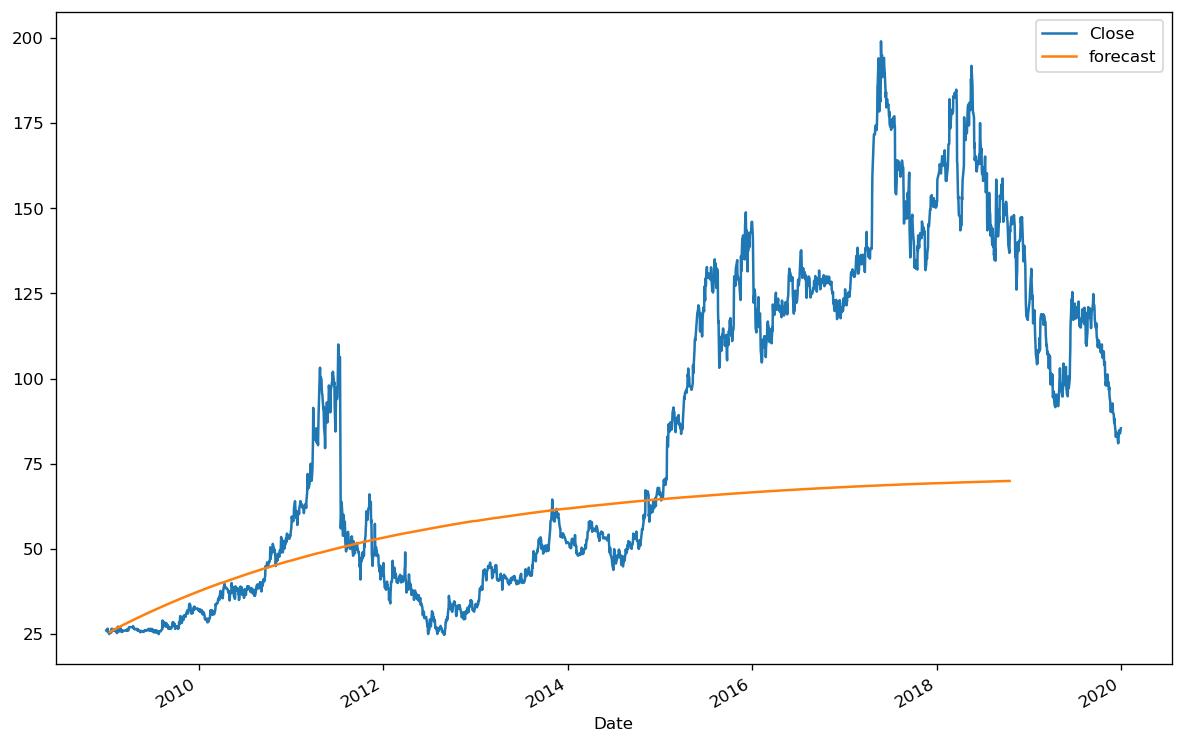

In [21]:
data['forecast']=model_fit.predict(start=10,end=2500,dynamic=True)
data[['Close','forecast']].plot(figsize=(12,8))

In [22]:
error = metrics.mean_squared_error(data['Close'][10:2500], data['forecast'][10:2500])
print('Test MSE: %.3f' % error)

Test MSE: 2149.437


## ARIMA multiple models

In [23]:
new=data[['Close']]

In [24]:
Train, Test = new.iloc[:count,0], new.iloc[count:,0]
history = [x for x in Train]

The result of the forecast() function is an array containing the forecast value, the standard error of the forecast, and the confidence interval information. 

In [25]:
predictions = list()
lower_list = []
upper_list = []
for t in range(len(Test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    lower = output[2][0][0]
    upper = output[2][0][1]
    predictions.append(yhat)
    lower_list.append(lower)
    upper_list.append(upper)
    obs = Test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=147.382582, expected=148.100000
predicted=147.954385, expected=145.300000
predicted=145.108262, expected=143.750000
predicted=143.725331, expected=142.500000
predicted=142.618379, expected=140.000000
predicted=140.142758, expected=135.200000
predicted=135.284546, expected=132.500000
predicted=132.688632, expected=134.500000
predicted=134.901682, expected=134.800000
predicted=135.081050, expected=134.100000
predicted=134.183292, expected=132.200000
predicted=132.171741, expected=133.400000
predicted=133.511669, expected=132.650000
predicted=132.741321, expected=132.000000
predicted=132.061195, expected=138.950000
predicted=139.213440, expected=137.450000
predicted=137.374133, expected=142.000000
predicted=141.978404, expected=141.100000
predicted=140.928097, expected=138.400000
predicted=138.221378, expected=140.550000
predicted=140.601356, expected=140.600000
predicted=140.701741, expected=141.450000
predicted=141.541742, expected=142.700000
predicted=142.725904, expected=142

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=120.332525, expected=117.400000
predicted=117.371215, expected=116.800000
predicted=116.795614, expected=115.600000
predicted=115.707151, expected=114.800000
predicted=114.825910, expected=116.200000
predicted=116.272667, expected=113.400000
predicted=113.481036, expected=112.000000
predicted=111.889065, expected=112.000000
predicted=112.078057, expected=109.200000
predicted=109.263948, expected=110.200000
predicted=110.165685, expected=109.200000
predicted=109.346702, expected=111.200000
predicted=111.202953, expected=110.000000
predicted=110.110938, expected=109.200000
predicted=109.121891, expected=109.000000
predicted=109.033469, expected=107.800000
predicted=107.845228, expected=107.800000
predicted=107.804747, expected=107.600000
predicted=107.670246, expected=108.400000
predicted=108.439099, expected=110.000000
predicted=110.078927, expected=107.400000
predicted=107.426988, expected=106.200000
predicted=106.077408, expected=106.000000
predicted=106.069431, expected=106

In [26]:
error = metrics.mean_squared_error(Test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 9.259


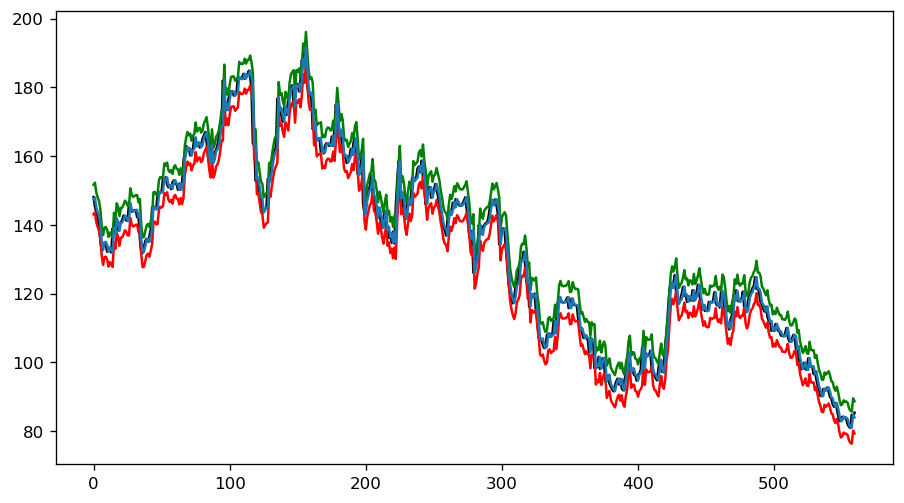

In [35]:
# plot
plt.plot(Test.values,color='black')
plt.plot(lower_list,color='red')
plt.plot(upper_list,color='green')
plt.plot(predictions)
plt.show()

## Prophet

In [28]:
new = data[['Close']]
new.reset_index(inplace=True)
new.columns = ['ds','y']
new

ds       y
0    2009-01-01   26.10
1    2009-01-02   25.91
2    2009-01-05   25.90
3    2009-01-06   26.54
4    2009-01-07   26.58
5    2009-01-08   25.50
6    2009-01-09   25.50
7    2009-01-12   25.50
8    2009-01-13   25.00
9    2009-01-14   25.50
10   2009-01-15   25.50
11   2009-01-16   25.50
12   2009-01-19   25.50
13   2009-01-20   25.70
14   2009-01-21   25.50
15   2009-01-22   26.54
16   2009-01-23   25.90
17   2009-01-26   26.50
18   2009-01-27   26.10
19   2009-01-28   25.97
20   2009-01-29   25.97
21   2009-01-30   25.95
22   2009-02-02   26.20
23   2009-02-03   26.23
24   2009-02-04   26.25
25   2009-02-05   26.23
26   2009-02-06   26.00
27   2009-02-09   25.69
28   2009-02-10   26.50
29   2009-02-11   26.00
30   2009-02-12   25.30
31   2009-02-13   25.30
32   2009-02-16   27.17
33   2009-02-17   25.78
34   2009-02-18   25.78
35   2009-02-19   26.74
36   2009-02-20   25.83
37   2009-02-23   25.83
38   2009-02-24   25.83
39   2009-02-25   25.83
40   2009-02-26   25.83
41   2009-02-27   26.71
42   2009-03-02   25.75
43   2009-03-03   26.00
44   2009-03-04   26.00
45   2009-03-05   26.00
46   2009-03-06   25.61
47   2009-03-09   26.00
48   2009-03-10   26.00
49   2009-03-11   26.00
50   2009-03-12   26.00
51   2009-03-13   26.00
52   2009-03-16   26.00
53   2009-03-17   26.00
54   2009-03-18   26.00
55   2009-03-19   26.00
56   2009-03-20   26.00
57   2009-03-23   26.00
58   2009-03-24   26.36
59   2009-03-25   26.05
60   2009-03-26   26.05
61   2009-03-27   26.05
62   2009-03-30   26.05
63   2009-03-31   26.92
64   2009-04-01   27.00
65   2009-04-02   27.00
66   2009-04-03   27.00
67   2009-04-06   27.00
68   2009-04-07   27.00
69   2009-04-08   27.00
70   2009-04-09   27.00
71   2009-04-10   27.00
72   2009-04-13   27.00
73   2009-04-14   27.00
74   2009-04-15   27.00
75   2009-04-16   27.02
76   2009-04-17   27.33
77   2009-04-20   26.55
78   2009-04-21   26.55
79   2009-04-22   26.55
80   2009-04-23   26.55
81   2009-04-24   26.35
82   2009-04-27   26.50
83   2009-04-28   26.47
84   2009-04-29   26.47
85   2009-04-30   26.47
86   2009-05-01   26.47
87   2009-05-04   26.50
88   2009-05-05   26.00
89   2009-05-06   26.30
90   2009-05-07   26.30
91   2009-05-08   25.93
92   2009-05-11   26.00
93   2009-05-12   26.00
94   2009-05-13   25.90
95   2009-05-14   25.90
96   2009-05-15   25.50
97   2009-05-18   25.90
98   2009-05-19   25.90
99   2009-05-20   25.90
100  2009-05-21   25.79
101  2009-05-22   25.79
102  2009-05-25   25.82
103  2009-05-26   25.65
104  2009-05-27   25.90
105  2009-05-28   25.65
106  2009-05-29   25.60
107  2009-06-01   26.00
108  2009-06-02   26.00
109  2009-06-03   26.00
110  2009-06-04   26.00
111  2009-06-05   26.17
112  2009-06-08   26.00
113  2009-06-09   26.10
114  2009-06-10   26.10
115  2009-06-11   26.10
116  2009-06-12   26.10
117  2009-06-15   26.10
118  2009-06-16   26.50
119  2009-06-17   26.50
120  2009-06-18   26.50
121  2009-06-19   26.50
122  2009-06-22   25.95
123  2009-06-23   26.50
124  2009-06-24   26.50
125  2009-06-25   26.50
126  2009-06-26   26.50
127  2009-06-29   26.48
128  2009-06-30   25.85
129  2009-07-01   25.90
130  2009-07-02   26.50
131  2009-07-03   26.01
132  2009-07-06   26.00
133  2009-07-07   25.50
134  2009-07-08   25.50
135  2009-07-09   26.01
136  2009-07-10   26.05
137  2009-07-13   26.05
138  2009-07-14   25.50
139  2009-07-15   26.05
140  2009-07-16   26.05
141  2009-07-17   25.50
142  2009-07-20   25.50
143  2009-07-21   26.00
144  2009-07-22   25.50
145  2009-07-23   25.80
146  2009-07-24   25.80
147  2009-07-27   25.00
148  2009-07-28   25.00
149  2009-07-29   25.80
150  2009-07-30   25.80
151  2009-07-31   25.80
152  2009-08-03   25.80
153  2009-08-04   25.80
154  2009-08-05   25.90
155  2009-08-06   26.10
156  2009-08-07   26.14
157  2009-08-10   26.32
158  2009-08-11   28.65
159  2009-08-12   28.99
160  2009-08-13   28.16
161  2009-08-14   27.00
162  2009-08-17   28.00
163  2009-08-18   28.50
164  2009-08-19   28.50
165  2009-08-20   27.80
166  

In [29]:
new.shape

(2800, 2)